# Average Word2Vec Classifier

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# load preprocessed text
review_data = pd.read_pickle("review_data.pkl")

In [5]:
!pip install gensim

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
import multiprocessing


In [0]:
# Tokenize all corpus and store in X_data_w2v
def tokenize(review_data):
  """Input pandas dataFrame with Text Field Name and It return tokenize list"""
  X_data_w2v = []
  for i in range(review_data.shape[0]):
      token = word_tokenize(review_data.Text.iloc[i])
      X_data_w2v.append(token)
  return X_data_w2v

X_data_w2v = tokenize(review_data)

In [0]:
# Train word2vec from scratch

# cores = multiprocessing.cpu_count()
# w2v_model = Word2Vec(min_count=1,
#                      window=2,
#                      size=100,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,
#                      workers=cores-1)

# Build vocabulary 
#w2v_model.build_vocab(X_data_w2v)
# Training
#w2v_model.train(X_data_w2v, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)



#make model memory and execution efficient only after completed training.
#w2v_model.init_sims(replace=True) 

# w2v_model.wv('Computer')
# w2v_model.wv.most_similar(positive=["Excellent"]) // similar word
# w2v_model.wv.similarity("Queen", 'Female') //similarity score
# w2v_model.wv.doesnt_match(['Cat', 'Tiger', 'Chair']) //odd one out

# Gives Train Accuracy 0.7959037165475416
# Gives Test Accuracy0.7948192219679634

In [0]:
# for twitter trained word2vec

#model = api.load("glove-twitter-25")

In [0]:
#Google News trained word2vec

!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model_w2v = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True) 

In [11]:
print("Vocabulary size of model : ",len(model_w2v.vocab))

Vocabulary size of model :  3000000


In [12]:
def calculate_avg_w2v(X_data_w2v):
  """pass list of tokenize text return average word2vec"""
  X_data_w2v1 = []
  vocab_doc = []
  X_data_w2v = np.array(X_data_w2v)

  for i in range(len(X_data_w2v)):
      for value in X_data_w2v[i]:
          if value in model_w2v.vocab:
              vocab_doc.append(value)
      X_data_w2v[i]= vocab_doc
      vocab_doc = []
      temp = model_w2v.wv[X_data_w2v[i]]
      doc_word = temp.shape[0]
      temp = np.sum(temp,axis=0)/doc_word
      X_data_w2v1.append(temp)
  return X_data_w2v1

X_data_w2v1 = calculate_avg_w2v(X_data_w2v)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


In [0]:
X_data_w2v1 = np.array(X_data_w2v1)

In [0]:
# Stratified Test Train Spilt

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_data_w2v1,review_data.Sentiment,
                                                 test_size=0.3,stratify=review_data.Sentiment,
                                                 random_state=42)

In [15]:
print("Dimention of Review",X_train.shape[1])

300

Note : Here Each Review represent by 300 dimension. less dimension means we can try various ML algorithm very fast. Unlike previous ones.

In [16]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

clf =  GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.6830303553355249
0.682233409610984


In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8969142534344916
0.8961189931350114


In [18]:
# Deep Learning Model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

batch_size = 256
epochs = 30

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(300,)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 254914 samples, validate on 109250 samples
Epoch 1/30
254914/254914 [==============================] - 5s 21us/step - loss: 0.3152 - acc: 0.8679 - val_loss: 0.2593 - val_acc: 0.8897
Epoch 2/30
254914/254914 [==============================] - 4s 15us/step - loss: 0.2567 - acc: 0.8928 - val_loss: 0.2498 - val_acc: 0.8944
Epoch 3/30
254914/254914 [==============================] - 4s 15us/step - loss: 0.2508 - acc: 0.8960 - val_loss: 0.2455 - val_acc: 0.8971
Epoch 4/30
254914/254914 [==============================] - 4s 15us/step - loss: 0.2463 - acc: 0.8984 - val_loss: 0.2428 - val_acc: 0.8987
Epoch 5/30
254914/254914 [==============================] - 4s 15us/step - loss: 0.2433 - acc: 0.8997 - val_loss: 0.2406 - val_acc: 0.8994
Epoch 6/30
254914/

In [19]:
# Best Accurcy given by MLP model
print('Train Accuracy:',model.evaluate(X_train, y_train, verbose=0)[1])
print('Test Accuracy:',model.evaluate(X_test, y_test, verbose=0)[1])

Train Accuracy: 0.917882109260378
Test Accuracy: 0.9114782608695652


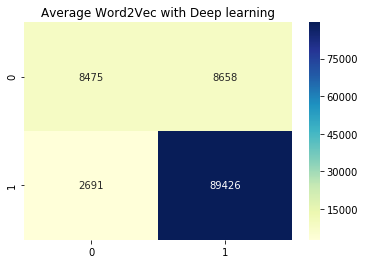

In [20]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cnf,annot=True,fmt='g',cmap="YlGnBu");
plt.title("Average Word2Vec with Deep learning");

Our Average Word2Vec Apppoch Gives Good Result but This approch don't outperform previous one.